# Global Statistics for T-Drive data set

In [13]:
import tdrive
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
dir_path = r'C:\dev\stanford\project\data'
taxis = tdrive.load_taxis(dir_path)

Loading 10336 taxis...
  1000
  2000
  3000
  4000
  5000
  6000
  7000
  8000
  9000
  10000
Done.


## Min and Max for lat/lon and time stamps

In [8]:
min_ts, min_lat, min_lon = [float('inf')]*3
max_ts, max_lat, max_lon = [float('-inf')]*3


for taxi in taxis:
    min_ts = min(min_ts, min(taxi.ts))
    max_ts = max(max_ts, max(taxi.ts))
    
    min_lat = min(min_lat, min(taxi.lat))
    max_lat = max(max_lat, max(taxi.lat))
    
    min_lon = min(min_lon, min(taxi.lon))
    max_lon = max(max_lon, max(taxi.lon))


print('Min/Max')
print('   timestamps  : [%f, %f]' % (min_ts, max_ts))
print('   latitude    : [%f, %f]' % (min_lat, max_lat))
print('   longitude   : [%f, %f]' % (min_lon, max_lon))
print('   duration    : %f hours' % ((max_ts - min_ts) / 3600))



Min/Max
   time stamps : [1201987844.000000, 1202521159.000000]
   latitude    : [0.000000, 255.300000]
   longitude   : [0.000000, 96.067670]
   duration of t-drive data : 148.143056 hours


## Histograms of all of the data

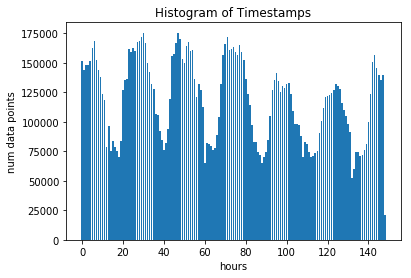

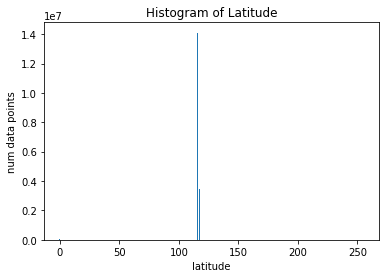

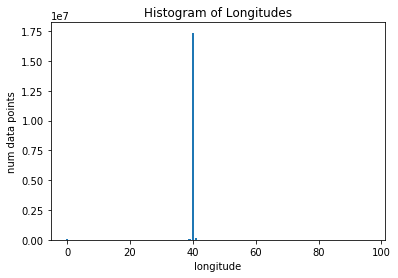

In [23]:
ts_counts = Counter()
lat_counts = Counter()
lon_counts = Counter()

for taxi in taxis:
    ts_counts.update([int(round(x / 3600.0)) for x in taxi.ts])
    lat_counts.update([int(round(x)) for x in taxi.lat])
    lon_counts.update([int(round(x)) for x in taxi.lon])
    
X = np.array(ts_counts.keys())
X = X - min(X)
Y = ts_counts.values()
plt.bar(X, Y)
plt.title('Histogram of Timestamps')
plt.xlabel('hours')
plt.ylabel('num data points')
plt.show()

X = lat_counts.keys()
Y = lat_counts.values()
plt.bar(X, Y)
plt.title('Histogram of Latitude')
plt.xlabel('latitude')
plt.ylabel('num data points')
plt.show()

X = lon_counts.keys()
Y = lon_counts.values()
plt.bar(X, Y)
plt.title('Histogram of Longitudes')
plt.xlabel('longitude')
plt.ylabel('num data points')
plt.show()